In [74]:
from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('train: ', Xtrain.shape)
print('Test: ', Xtest.shape)

train:  (60000, 28, 28)
Test:  (10000, 28, 28)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
from keras.models import Model
from keras.layers import Input, merge, concatenate
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
import keras.utils.np_utils as kutils
from keras.optimizers import Adam


3


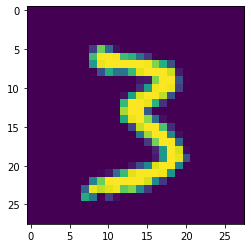

In [4]:
i=130
plt.imshow(Xtrain[i])
print(ytrain[i])

In [32]:
ytrain = kutils.to_categorical(ytrain)

In [37]:
ytrain.shape[1]

10

In [ ]:
input_shape=(28, 28,1)
n_classes=ytrain.shape[1]
batch_size = 1024 
nb_epoch = 10

In [12]:
ytest = kutils.to_categorical(ytest)

In [75]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
#SqueezeNet Implementation
def fire_module(input_layer,n_squeeze,n_expand):
    squeezeLayer= Convolution2D(n_squeeze, (1, 1), activation='relu', padding ='valid')(input_layer)
    expandLayer1= Convolution2D(n_expand, (1, 1), activation='relu', padding ='valid')(squeezeLayer)
    expandLayer2= Convolution2D(n_expand,(3, 3), activation='relu', padding ='same')(squeezeLayer)
    squeezed = concatenate([expandLayer1, expandLayer2], axis=3)
    return squeezed
    

In [67]:
# Model Construction
input_layer = Input(shape=input_shape, name="input")

#conv 1
model = Convolution2D(96, (3, 3), activation='relu', strides=(2, 2), padding='valid')(input_layer)
#maxpool 1
model = MaxPooling2D(pool_size=(2,2), strides=(2, 2))(model)
#1
model = fire_module(model, 16, 16)
#2
model = fire_module(model, 16, 16)
model = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(model)
#3
model = fire_module(model, 32,32)
#4
model = fire_module(model, 32, 32)

model = MaxPooling2D(pool_size=(3, 3), strides=(2, 2),padding='same')(model)
#5
model = fire_module(model, 48,48)
#6
model = fire_module(model, 48,48)
#7
model = fire_module(model,64,64)
#8
model = fire_module(model, 64,64)
model =Dropout(0.5)(model)

#10th layer
model = Convolution2D(10, (1, 1), activation='relu',  padding='valid')(model)
model= Flatten()(model)

#output
out = Dense(n_classes, activation="softmax")(model)
#For regression
#out = Dense(activation="linear")(model)

modelsqueeze= Model(input_layer, out)
modelsqueeze.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_148 (Conv2D)             (None, 13, 13, 96)   960         input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_26 (MaxPooling2D) (None, 6, 6, 96)     0           conv2d_148[0][0]                 
__________________________________________________________________________________________________
conv2d_149 (Conv2D)             (None, 6, 6, 16)     1552        max_pooling2d_26[0][0]           
____________________________________________________________________________________________

In [68]:
adam = Adam(lr = 0.0001)

In [69]:
modelsqueeze.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [70]:
modelsqueeze.fit(np.expand_dims(Xtrain, axis=3),ytrain,nb_epoch=nb_epoch)

/Users/akshayaravi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 33s 543us/step - loss: 1.2849 - accuracy: 0.5449
Epoch 2/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.4130 - accuracy: 0.8860
Epoch 3/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.2613 - accuracy: 0.9332
Epoch 4/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.2019 - accuracy: 0.9477
Epoch 5/10
60000/60000 [==============================] - 47s 782us/step - loss: 0.1688 - accuracy: 0.9569
Epoch 6/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.1430 - accuracy: 0.9628
Epoch 7/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.1245 - accuracy: 0.9671
Epoch 8/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.1110 - accuracy: 0.9706
Epoch 9/10
60000/60000 [==============================] - 38s 635us/step - loss: 0.0975 - accuracy: 0.9741
Epoch 10/10
60000/60000 [============

In [71]:
yPred = modelsqueeze.predict(np.expand_dims(Xtest, axis=3), verbose=1)
yPred = np.argmax(yPred, axis=1)

10000/10000 [==============================] - 1s 108us/step


In [72]:
yPred

array([7, 2, 1, ..., 4, 5, 6])

1


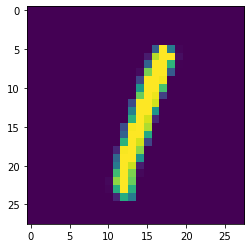

In [78]:
i=5
plt.imshow(Xtest[i])
print(ytest[i])

In [80]:
import pandas as pd

In [81]:
result=pd.DataFrame()

In [82]:
result["Prediction"]=yPred
result["Actual"]= ytest

In [83]:
result

,Prediction,Actual
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [84]:
result[result["Prediction"]!= result["Actual"]]

,Prediction,Actual
18,5,3
36,2,7
43,0,2
124,4,7
149,8,2
...,...,...
9768,8,2
9770,6,5
9941,8,5
9944,8,3


In [85]:
from sklearn import metrics

In [86]:
print(metrics.confusion_matrix(ytest, yPred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(ytest, yPred, digits=3))

[[ 965    0    3    0    1    0    8    1    1    1]
 [   1 1124    4    0    1    1    3    1    0    0]
 [  13    0 1007    1    0    0    4    2    5    0]
 [   0    1    9  969    0    6    0    2   14    9]
 [   0    0    0    0  965    0    9    0    0    8]
 [   3    0    0    1    1  858   14    0    9    6]
 [   9    1    2    0    2    1  941    0    2    0]
 [   3    5   12    2    7    0    0  973    6   20]
 [   0    6    3    2    3    2    5    1  949    3]
 [   3    1    0    1    8    1    1    4   10  980]]
              precision    recall  f1-score   support

           0      0.968     0.985     0.976       980
           1      0.988     0.990     0.989      1135
           2      0.968     0.976     0.972      1032
           3      0.993     0.959     0.976      1010
           4      0.977     0.983     0.980       982
           5      0.987     0.962     0.974       892
           6      0.955     0.982     0.969       958
           7      0.989     0.946   